### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 6
### Due: Friday, Oct 13 at 11:59 pm CT

## Problem 1

This week also we have only one problem worth 20 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw6_data.npy`. This is a (100 x 2) numpy array, with measurements in the first column and uncertainties in the second column. Using the analytic results for heteroscedastic Gaussian data from lectures, compute the sample mean and the standard error on the sample mean from for this data.

2) Using the bootstrap method, generate $1000$ bootstrap realizations of this dataset. *DO NOT use the `astroML` code. Write your own bootstrap function from scratch. Also recall that when resampling data, measurements and uncertainties should stay paired together.*

3) Compute sample mean for all $1000$ boostrap datasets to find the distribution of the sample mean. Plot a normalized histogram of these bootstrap means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

4) Write a code to generate $100$ Jackknife datasets using the Jackknife method with one leave-off.  *DO NOT use the `astroML` code*. 

5) Compute sample mean for all $100$ Jackknife datasets to find the distribution of the sample mean. Plot a normalized histogram of these Jackknife means, and overplot a Gaussian pdf with the mean and std found in (1). Do these agree?

3.937547512109005 is the sample mean.
0.11565177228177984 is the standard error on the sample mean.

Bootstrap Results:
Bootstrap Sample Mean: [3.84067984 4.01285245 3.96097374 4.06330185 4.041898   3.87142973
 4.0018921  3.85343289 3.98426582 3.998436   3.79061448 3.94848369
 3.9767913  3.69509689 3.82168985 3.91663331 3.99069638 3.95813744
 4.02681802 4.06078221 3.97760151 3.87245109 3.82846303 4.0366827
 4.06277961 3.86831531 4.08069705 3.74955849 3.98370569 3.87994441
 4.04713233 3.94826721 4.01830342 3.81902844 3.76631037 4.04836218
 3.7803624  3.81965701 3.95004493 3.98524298 3.70586854 3.97442832
 4.03195195 3.75131147 4.04941341 3.97107397 3.85914233 3.90683027
 3.87618795 3.80411045 3.72152993 3.88980023 3.94437812 3.80114109
 3.92209543 4.01280509 3.962459   4.13240206 3.89538939 4.12453318
 4.00215054 3.92422222 3.94678662 4.04169434 3.8967927  3.69457385
 4.01013613 3.95151706 3.82125062 4.005938   4.01610101 3.84395603
 3.81579612 3.87637297 3.76893381 3.85751238 3.9832631

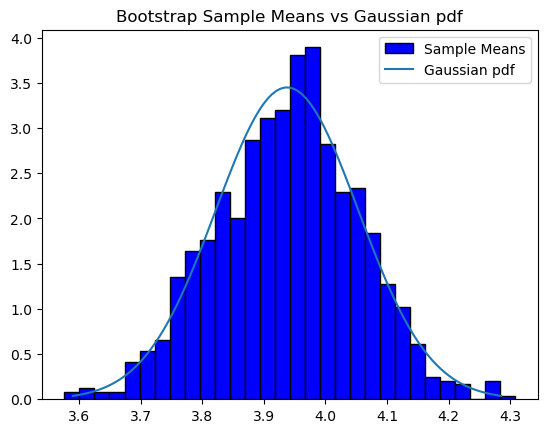

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# 1. Import data
data = np.load('hw6_data.npy')
meas = data[:, 0]

# Compute the sample mean and standard error
def mean(x):
    return np.mean(x)

muhat = mean(meas)
print(muhat, "is the sample mean.")

standard_error = np.std(meas, ddof=1) / np.sqrt(len(meas))
print(standard_error, "is the standard error on the sample mean.")

# 2. Using the bootstrap method, generate 1000 bootstrap realizations of this dataset
def bootstrap(data, num_samples):
    num_data_points = len(data)
    bootstrap_samples = np.empty((num_samples, num_data_points), dtype=float)

    for i in range(num_samples):
        # Randomly resample with replacement
        resampled_indices = np.random.choice(num_data_points, num_data_points, replace=True)
        bootstrap_samples[i] = data[resampled_indices]

    return bootstrap_samples

# Random sample 1000 data points from {xi}
num_bootstrap_samples = 1000
bootstrap_realizations = bootstrap(meas, num_bootstrap_samples)

# Calculate sample means
bootstrap_sample_means = np.mean(bootstrap_realizations, axis=1)

# Calculate the standard error on the sample mean
bootstrap_standard_error = np.std(bootstrap_sample_means, ddof=1)

print("\nBootstrap Results:")
print("Bootstrap Sample Mean:", bootstrap_sample_means)
print("Bootstrap Standard Error:", bootstrap_standard_error)

#Plot a normalized histogram of the bootstrap sample means
plt.hist(bootstrap_sample_means, density=True, bins=30, color='blue', edgecolor='black', label="Sample Means")
plt.title("Bootstrap Sample Means vs Gaussian pdf")

# Adjust the width of the Gaussian pdf
x = np.linspace(muhat - 3 * bootstrap_standard_error, muhat + 3 * bootstrap_standard_error, 100)
plt.plot(x, norm.pdf(x, muhat, standard_error), label="Gaussian pdf")

plt.legend()
plt.show()


These seem to agree with the mean and standard deviation.

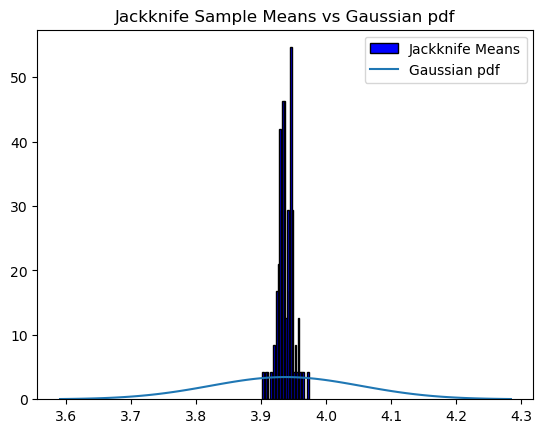

In [2]:
#4. Write a code to generate 100 Jackknife datasets using the Jackknife method with one leave-off

# Define jacknife function to return samples
def jackknife(data):
    num_data_points = len(data)
    jackknife_samples = np.empty((num_data_points, num_data_points - 1), dtype=float) # num_data_points - 1 gives the leave-off

    for i in range(num_data_points):
        jackknife_samples[i] = np.delete(data, i)

    return jackknife_samples

# Generate 100 Jackknife datasets
num_jackknife_datasets = 100
jackknife_realizations = jackknife(meas)[:num_jackknife_datasets]

#5. Calculate sample means
jackknife_sample_means = np.mean(jackknife_realizations, axis=1)

# Plot the normalized histogram
plt.hist(jackknife_sample_means, density=True, bins=30, color='blue', edgecolor='black', label="Jackknife Means")
plt.title("Jackknife Sample Means vs Gaussian pdf")

# Adjust the width of the Gaussian pdf
x = np.linspace(muhat - 3 * standard_error, muhat + 3 * standard_error, 100)
plt.plot(x, norm.pdf(x, muhat, standard_error), label="Gaussian pdf")

plt.legend()
plt.show()


This does not work like the bootstrap method did because the jacknife method is not good for ranked statistics. The mean is similar, but the variance is not.